# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**GitHub:** https://github.com/Doradalberto/APS_Isadora_Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1


Lê os arquivos que vamos utilizar no projeto:

In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [4]:
vida = pd.read_excel('life_expectancy_years.xlsx')

Altera o índice das tabelas:

In [86]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

Países pertencentes ao Bloco SADC (áfrica austral):

In [6]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

Paises da áfrica que não pertencem ao Bloco SADC:

In [7]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

Lista total de Anos

In [8]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

Lista da primeira metade

In [9]:
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]

Lista da segunda metade

In [10]:
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [11]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

In [12]:
dados_af_aus = dados_indice.loc[af_aus]
     #imprime todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]
     #imprime todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]

vida_af_nao_aus = vida_indice.loc[af_nao_aus]

In [73]:
dados_af_aus

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82500000000,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11,1.030000e+11,1.040000e+11,1,0
South Africa,7.900000e+10,8.210000e+10,8.710000e+10,9.360000e+10,1.010000e+11,1.070000e+11,1.120000e+11,1.200000e+11,1.250000e+11,1.310000e+11,...,375000000000,3.880000e+11,3.960000e+11,4.060000e+11,4.140000e+11,4.190000e+11,4.210000e+11,4.270000e+11,1,0
Botswana,2.050000e+08,2.180000e+08,2.330000e+08,2.460000e+08,2.630000e+08,2.780000e+08,2.960000e+08,3.140000e+08,3.470000e+08,3.990000e+08,...,12800000000,1.360000e+10,1.420000e+10,1.580000e+10,1.640000e+10,1.610000e+10,1.680000e+10,1.720000e+10,1,0
"Congo, Dem. Rep.",1.580000e+10,1.410000e+10,1.710000e+10,1.800000e+10,1.760000e+10,1.770000e+10,1.890000e+10,1.880000e+10,1.960000e+10,2.140000e+10,...,21600000000,2.300000e+10,2.470000e+10,2.680000e+10,2.930000e+10,3.130000e+10,3.210000e+10,3.330000e+10,1,0
Lesotho,2.190000e+08,2.230000e+08,2.570000e+08,2.850000e+08,3.080000e+08,3.150000e+08,3.140000e+08,3.480000e+08,3.460000e+08,3.520000e+08,...,2390000000,2.550000e+09,2.700000e+09,2.750000e+09,2.840000e+09,2.910000e+09,2.980000e+09,3.150000e+09,1,0
Madagascar,3.650000e+09,3.730000e+09,3.810000e+09,3.780000e+09,3.930000e+09,3.910000e+09,3.990000e+09,4.210000e+09,4.500000e+09,4.660000e+09,...,8730000000,8.860000e+09,9.130000e+09,9.330000e+09,9.640000e+09,9.940000e+09,1.040000e+10,1.080000e+10,1,0
Malawi,8.730000e+08,9.390000e+08,9.460000e+08,9.330000e+08,9.570000e+08,1.090000e+09,1.230000e+09,1.320000e+09,1.300000e+09,1.370000e+09,...,6960000000,7.300000e+09,7.440000e+09,7.820000e+09,8.270000e+09,8.500000e+09,8.710000e+09,9.060000e+09,1,0
Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10000000000,1.040000e+10,1.080000e+10,1.110000e+10,1.160000e+10,1.200000e+10,1.240000e+10,1.290000e+10,1,0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10200000000,1.090000e+10,1.170000e+10,1.250000e+10,1.340000e+10,1.430000e+10,1.480000e+10,1.540000e+10,1,0


In [14]:
dados_af_nao_aus.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Benin,1.270000e+09,1.310000e+09,1.260000e+09,1.320000e+09,1.410000e+09,1.480000e+09,1.540000e+09,1.550000e+09,1.610000e+09,1.660000e+09,...,6970000000,7.180000e+09,7.520000e+09,8.060000e+09,8.580000e+09,8.760000e+09,9.100000e+09,9.610000e+09,0,1
Burkina Faso,1.150000e+09,1.200000e+09,1.270000e+09,1.260000e+09,1.290000e+09,1.330000e+09,1.340000e+09,1.460000e+09,1.510000e+09,1.540000e+09,...,8980000000,9.580000e+09,1.020000e+10,1.080000e+10,1.120000e+10,1.170000e+10,1.240000e+10,1.320000e+10,0,1
Burundi,5.970000e+08,5.150000e+08,5.610000e+08,5.840000e+08,6.210000e+08,6.460000e+08,6.760000e+08,7.690000e+08,7.670000e+08,7.550000e+08,...,2030000000,2.110000e+09,2.200000e+09,2.300000e+09,2.400000e+09,2.310000e+09,2.300000e+09,2.310000e+09,0,1


In [45]:
dados_indice.AF_AUS.value_counts()      #conta os paises que sao da SADC

0    176
1     14
Name: AF_AUS, dtype: int64

In [46]:
dados_indice.AF_NAO_AUS.value_counts()       #conta os paises que são da áfrica mas não sao da SADC

0    163
1     27
Name: AF_NAO_AUS, dtype: int64

In [47]:
vida_indice.AF_AUS.value_counts()

0    173
1     14
Name: AF_AUS, dtype: int64

In [48]:
vida_indice.AF_NAO_AUS.value_counts()

0    160
1     27
Name: AF_NAO_AUS, dtype: int64

In [19]:
africa = af_aus + af_nao_aus
dados_africa = dados_indice.loc[africa]

In [82]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum()

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum()

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum() ##

soma_aus_total = soma_aus_anos1 + soma_aus_anos2

In [21]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum() ##

soma_nao_aus_total = soma_nao_aus_anos1 + soma_nao_aus_anos2

In [41]:
sem_nulo = nao_aus_anos_total.dropna()

In [22]:
aus_anos_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+10,...,3.500000e+10,3.860000e+10,4.670000e+10,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10
South Africa,1.440000e+11,1.460000e+11,1.530000e+11,1.620000e+11,1.650000e+11,1.680000e+11,1.680000e+11,1.730000e+11,1.800000e+11,1.920000e+11,...,2.930000e+11,3.060000e+11,3.220000e+11,3.400000e+11,3.580000e+11,3.700000e+11,3.640000e+11,3.750000e+11,3.880000e+11,3.960000e+11
Botswana,5.880000e+08,7.430000e+08,9.020000e+08,9.810000e+08,1.060000e+09,1.180000e+09,1.320000e+09,1.510000e+09,1.690000e+09,1.890000e+09,...,9.530000e+09,9.790000e+09,1.020000e+10,1.110000e+10,1.200000e+10,1.280000e+10,1.180000e+10,1.280000e+10,1.360000e+10,1.420000e+10
"Congo, Dem. Rep.",2.260000e+10,2.270000e+10,2.450000e+10,2.530000e+10,2.400000e+10,2.270000e+10,2.290000e+10,2.170000e+10,2.180000e+10,2.230000e+10,...,1.450000e+10,1.550000e+10,1.650000e+10,1.730000e+10,1.840000e+10,1.960000e+10,2.010000e+10,2.160000e+10,2.300000e+10,2.470000e+10
Lesotho,3.780000e+08,3.770000e+08,4.770000e+08,5.290000e+08,4.570000e+08,5.080000e+08,6.190000e+08,7.320000e+08,7.530000e+08,7.330000e+08,...,1.790000e+09,1.820000e+09,1.890000e+09,1.970000e+09,2.060000e+09,2.200000e+09,2.250000e+09,2.390000e+09,2.550000e+09,2.700000e+09
Madagascar,5.100000e+09,5.040000e+09,4.910000e+09,5.000000e+09,5.070000e+09,4.910000e+09,5.030000e+09,4.890000e+09,5.380000e+09,5.420000e+09,...,6.890000e+09,7.260000e+09,7.590000e+09,7.970000e+09,8.470000e+09,9.070000e+09,8.710000e+09,8.730000e+09,8.860000e+09,9.130000e+09
Malawi,1.600000e+09,1.700000e+09,1.740000e+09,1.870000e+09,1.980000e+09,2.080000e+09,2.180000e+09,2.390000e+09,2.500000e+09,2.510000e+09,...,4.470000e+09,4.710000e+09,4.870000e+09,5.100000e+09,5.580000e+09,6.010000e+09,6.510000e+09,6.960000e+09,7.300000e+09,7.440000e+09
Mauritius,NaN,NaN,NaN,NaN,NaN,2.120000e+09,2.260000e+09,2.350000e+09,2.430000e+09,2.190000e+09,...,7.160000e+09,7.580000e+09,7.670000e+09,8.330000e+09,8.800000e+09,9.280000e+09,9.580000e+09,1.000000e+10,1.040000e+10,1.080000e+10
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.260000e+09,...,6.050000e+09,6.530000e+09,7.100000e+09,7.790000e+09,8.370000e+09,8.950000e+09,9.520000e+09,1.020000e+10,1.090000e+10,1.170000e+10


In [23]:
nao_aus_anos_total

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
Benin,1.670000e+09,1.770000e+09,1.840000e+09,1.900000e+09,1.810000e+09,1.820000e+09,1.920000e+09,1.940000e+09,2.070000e+09,2.210000e+09,...,5.430000e+09,5.680000e+09,5.770000e+09,6.000000e+09,6.360000e+09,6.670000e+09,6.830000e+09,6.970000e+09,7.180000e+09,7.520000e+09
Burkina Faso,1.560000e+09,1.600000e+09,1.600000e+09,1.740000e+09,1.790000e+09,1.940000e+09,1.950000e+09,2.040000e+09,2.110000e+09,2.130000e+09,...,6.050000e+09,6.320000e+09,6.870000e+09,7.300000e+09,7.710000e+09,8.280000e+09,8.520000e+09,8.980000e+09,9.580000e+09,1.020000e+10
Burundi,9.420000e+08,8.810000e+08,9.420000e+08,9.350000e+08,9.420000e+08,1.020000e+09,1.130000e+09,1.120000e+09,1.140000e+09,1.150000e+09,...,1.540000e+09,1.610000e+09,1.630000e+09,1.710000e+09,1.800000e+09,1.890000e+09,1.950000e+09,2.030000e+09,2.110000e+09,2.200000e+09
Cameroon,6.270000e+09,6.440000e+09,6.790000e+09,7.520000e+09,8.360000e+09,7.900000e+09,8.990000e+09,1.100000e+10,1.160000e+10,1.140000e+10,...,2.020000e+10,2.160000e+10,2.200000e+10,2.280000e+10,2.390000e+10,2.470000e+10,2.530000e+10,2.610000e+10,2.720000e+10,2.850000e+10
Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.930000e+08,...,1.060000e+09,1.170000e+09,1.250000e+09,1.350000e+09,1.560000e+09,1.660000e+09,1.640000e+09,1.660000e+09,1.730000e+09,1.750000e+09
Central African Republic,1.110000e+09,1.110000e+09,1.130000e+09,1.200000e+09,1.210000e+09,1.270000e+09,1.320000e+09,1.330000e+09,1.300000e+09,1.240000e+09,...,1.580000e+09,1.680000e+09,1.690000e+09,1.770000e+09,1.860000e+09,1.890000e+09,1.930000e+09,1.990000e+09,2.050000e+09,2.140000e+09
Chad,2.260000e+09,2.280000e+09,2.090000e+09,2.200000e+09,2.400000e+09,2.470000e+09,2.520000e+09,2.510000e+09,1.970000e+09,1.850000e+09,...,5.360000e+09,7.170000e+09,8.410000e+09,8.460000e+09,8.740000e+09,9.010000e+09,9.390000e+09,1.070000e+10,1.070000e+10,1.160000e+10
"Congo, Rep.",2.400000e+09,2.600000e+09,2.820000e+09,3.040000e+09,3.280000e+09,3.310000e+09,3.010000e+09,3.200000e+09,3.520000e+09,4.140000e+09,...,8.350000e+09,8.640000e+09,9.310000e+09,9.890000e+09,9.730000e+09,1.030000e+10,1.100000e+10,1.200000e+10,1.240000e+10,1.290000e+10
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130000e+09,NaN,NaN


In [24]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

soma_africa_total = soma_africa_anos1 + soma_africa_anos2

In [38]:
soma_africa_total

1971   NaN
1972   NaN
1973   NaN
1974   NaN
1975   NaN
1976   NaN
1977   NaN
1978   NaN
1979   NaN
1980   NaN
1981   NaN
1982   NaN
1983   NaN
1984   NaN
1985   NaN
1986   NaN
1987   NaN
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
dtype: float64

In [37]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+10,...,4.670000e+10,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,1,0
South Africa,1.440000e+11,1.460000e+11,1.530000e+11,1.620000e+11,1.650000e+11,1.680000e+11,1.680000e+11,1.730000e+11,1.800000e+11,1.920000e+11,...,3.220000e+11,3.400000e+11,3.580000e+11,3.700000e+11,3.640000e+11,3.750000e+11,3.880000e+11,3.960000e+11,1,0
Botswana,5.880000e+08,7.430000e+08,9.020000e+08,9.810000e+08,1.060000e+09,1.180000e+09,1.320000e+09,1.510000e+09,1.690000e+09,1.890000e+09,...,1.020000e+10,1.110000e+10,1.200000e+10,1.280000e+10,1.180000e+10,1.280000e+10,1.360000e+10,1.420000e+10,1,0
"Congo, Dem. Rep.",2.260000e+10,2.270000e+10,2.450000e+10,2.530000e+10,2.400000e+10,2.270000e+10,2.290000e+10,2.170000e+10,2.180000e+10,2.230000e+10,...,1.650000e+10,1.730000e+10,1.840000e+10,1.960000e+10,2.010000e+10,2.160000e+10,2.300000e+10,2.470000e+10,1,0
Lesotho,3.780000e+08,3.770000e+08,4.770000e+08,5.290000e+08,4.570000e+08,5.080000e+08,6.190000e+08,7.320000e+08,7.530000e+08,7.330000e+08,...,1.890000e+09,1.970000e+09,2.060000e+09,2.200000e+09,2.250000e+09,2.390000e+09,2.550000e+09,2.700000e+09,1,0
Madagascar,5.100000e+09,5.040000e+09,4.910000e+09,5.000000e+09,5.070000e+09,4.910000e+09,5.030000e+09,4.890000e+09,5.380000e+09,5.420000e+09,...,7.590000e+09,7.970000e+09,8.470000e+09,9.070000e+09,8.710000e+09,8.730000e+09,8.860000e+09,9.130000e+09,1,0
Malawi,1.600000e+09,1.700000e+09,1.740000e+09,1.870000e+09,1.980000e+09,2.080000e+09,2.180000e+09,2.390000e+09,2.500000e+09,2.510000e+09,...,4.870000e+09,5.100000e+09,5.580000e+09,6.010000e+09,6.510000e+09,6.960000e+09,7.300000e+09,7.440000e+09,1,0
Mauritius,NaN,NaN,NaN,NaN,NaN,2.120000e+09,2.260000e+09,2.350000e+09,2.430000e+09,2.190000e+09,...,7.670000e+09,8.330000e+09,8.800000e+09,9.280000e+09,9.580000e+09,1.000000e+10,1.040000e+10,1.080000e+10,1,0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.260000e+09,...,7.100000e+09,7.790000e+09,8.370000e+09,8.950000e+09,9.520000e+09,1.020000e+10,1.090000e+10,1.170000e+10,1,0


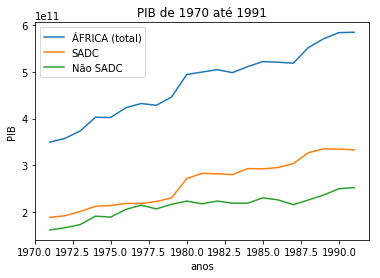

In [42]:
plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA (total)")
plt.plot(anos_1, soma_aus_anos1, label="SADC")
plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 1991")
plt.legend()
plt.show()

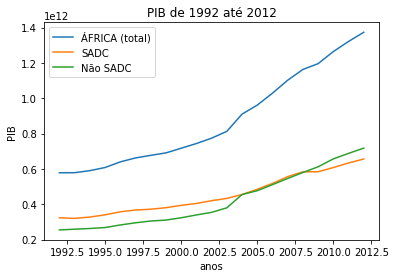

In [43]:
#SOMA AFRICA TOTAL (ANOS 2 + ANOS1) TA DANDO NAN

plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA (total)")
plt.plot(anos_2, soma_aus_anos2, label="SADC")
plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC")  # soma_aus e soma_nao_aus tao dando os mesmos valores!
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1992 até 2012")
plt.legend()
plt.show()

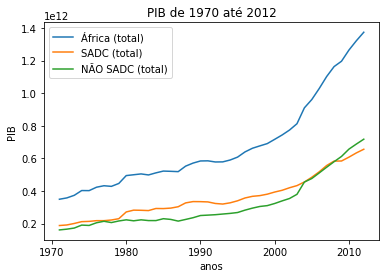

In [28]:
#plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA após (total)") -- com a divisao 
#plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA antes (total)") -- com a divisao
#plt.plot(anos_2, soma_aus_anos2, label="SADC após") -- com a divisao
#plt.plot(anos_1, soma_aus_anos1, label="SADC antes") -- com a divisao
#plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC após") -- com a divisao
#plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC antes") -- com a divisao
plt.plot(anos, soma_africa_anos_total, label="África (total)")
plt.plot(anos, soma_aus_anos_total, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

# ISSO É COMO O GRÁFICO DO TOTAL (CÉLULA DE BAIXO) DEVE PARECER >> fiz o total com o intervalo de tempo maior
# Divisão: entre os dois intervalos de tempo definidos (com uma "falha" no gráfico)-- a falha é intencional!

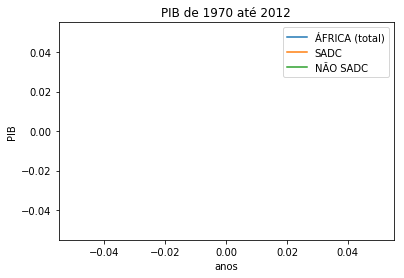

In [44]:
#   CÓDIGO EM CONSTRUÇÃO   

plt.plot(anos, soma_africa_total, label="ÁFRICA (total)")    #somar o PIB de todos paises da áfrica (total)
plt.plot(anos, soma_aus_total, label="SADC")    #somar o PIB todos os paises POR ANO que sao da SADC
plt.plot(anos, soma_nao_aus_total, label="NÃO SADC")     #somar o PIB de todos os paises POR ANO que não sao da SADC
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

#  O TOTAL TA DANDO NOT A NUMBER (NaN) !!!

**Join**

pegar o 1º ano de análise (1972) e o último ano de análise (2010) 

In [57]:
dados_af_aus

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82500000000,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11,1.030000e+11,1.040000e+11,1,0
South Africa,7.900000e+10,8.210000e+10,8.710000e+10,9.360000e+10,1.010000e+11,1.070000e+11,1.120000e+11,1.200000e+11,1.250000e+11,1.310000e+11,...,375000000000,3.880000e+11,3.960000e+11,4.060000e+11,4.140000e+11,4.190000e+11,4.210000e+11,4.270000e+11,1,0
Botswana,2.050000e+08,2.180000e+08,2.330000e+08,2.460000e+08,2.630000e+08,2.780000e+08,2.960000e+08,3.140000e+08,3.470000e+08,3.990000e+08,...,12800000000,1.360000e+10,1.420000e+10,1.580000e+10,1.640000e+10,1.610000e+10,1.680000e+10,1.720000e+10,1,0
"Congo, Dem. Rep.",1.580000e+10,1.410000e+10,1.710000e+10,1.800000e+10,1.760000e+10,1.770000e+10,1.890000e+10,1.880000e+10,1.960000e+10,2.140000e+10,...,21600000000,2.300000e+10,2.470000e+10,2.680000e+10,2.930000e+10,3.130000e+10,3.210000e+10,3.330000e+10,1,0
Lesotho,2.190000e+08,2.230000e+08,2.570000e+08,2.850000e+08,3.080000e+08,3.150000e+08,3.140000e+08,3.480000e+08,3.460000e+08,3.520000e+08,...,2390000000,2.550000e+09,2.700000e+09,2.750000e+09,2.840000e+09,2.910000e+09,2.980000e+09,3.150000e+09,1,0
Madagascar,3.650000e+09,3.730000e+09,3.810000e+09,3.780000e+09,3.930000e+09,3.910000e+09,3.990000e+09,4.210000e+09,4.500000e+09,4.660000e+09,...,8730000000,8.860000e+09,9.130000e+09,9.330000e+09,9.640000e+09,9.940000e+09,1.040000e+10,1.080000e+10,1,0
Malawi,8.730000e+08,9.390000e+08,9.460000e+08,9.330000e+08,9.570000e+08,1.090000e+09,1.230000e+09,1.320000e+09,1.300000e+09,1.370000e+09,...,6960000000,7.300000e+09,7.440000e+09,7.820000e+09,8.270000e+09,8.500000e+09,8.710000e+09,9.060000e+09,1,0
Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10000000000,1.040000e+10,1.080000e+10,1.110000e+10,1.160000e+10,1.200000e+10,1.240000e+10,1.290000e+10,1,0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10200000000,1.090000e+10,1.170000e+10,1.250000e+10,1.340000e+10,1.430000e+10,1.480000e+10,1.540000e+10,1,0


In [159]:
af_aus_1972 = dados_af_aus[1972]
af_nao_aus_1972 = dados_af_nao_aus[1972]
af_aus_2010 = dados_af_aus[2010]
af_nao_aus_2010 = dados_af_nao_aus[2010]
vida_af_aus_2010 = vida_af_aus[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus[2010]
vida_af_aus_1972 = vida_af_aus[1972]
vida_af_nao_aus_1972 = vida_af_nao_aus[1972]
vida_af_nao_aus_1972.set_index('gr')

af_aus_1972.rename("PIB 1972", inplace=True)
af_nao_aus_1972.rename("PIB 1972", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010 não AUS", inplace=True)
vida_af_aus_1972.rename("ExpVida 1972", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1972 não AUS", inplace=True)


AttributeError: 'Series' object has no attribute 'set_index'

In [160]:
vida_af_nao_aus_1972

country
Benin                       48.2
Burkina Faso                45.0
Burundi                     18.2
Cameroon                    52.5
Cape Verde                  58.9
Central African Republic    48.3
Chad                        49.9
Congo, Rep.                 49.6
Djibouti                    60.3
Eritrea                     46.0
Ethiopia                    44.0
Gabon                       53.1
Gambia                      55.8
Ghana                       55.9
Guinea                      45.4
Guinea-Bissau               41.3
Liberia                     48.5
Mali                        40.6
Niger                       43.7
Nigeria                     51.0
Rwanda                      46.9
Senegal                     48.1
Seychelles                  66.4
Sierra Leone                46.4
Sudan                       53.4
Togo                        52.8
Uganda                      50.8
Name: ExpVida 1972 não AUS, dtype: float64

In [154]:
comp_2010_af_aus = pd.concat([af_aus_2010, vida_af_aus_2010], axis=1)
comp_2010_af_aus

,PIB 2010,ExpVida 2010
country,,
Angola,82500000000,60.1
South Africa,375000000000,54.3
Botswana,12800000000,57.1
"Congo, Dem. Rep.",21600000000,57.5
Lesotho,2390000000,46.5
Madagascar,8730000000,60.8
Malawi,6960000000,53.1
Mauritius,10000000000,73.4
Mozambique,10200000000,54.5


In [155]:
comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1)
comp_2010_af_nao_aus

,PIB 2010,ExpVida 2010 não AUS
country,,
Benin,6970000000,61.8
Burkina Faso,8980000000,57.9
Burundi,2030000000,57.7
Cameroon,26100000000,57.3
Cape Verde,1660000000,72.5
Central African Republic,1990000000,47.5
Chad,10700000000,56.5
"Congo, Rep.",12000000000,60.4
Djibouti,1130000000,63.7


In [156]:
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1)
comp_1972_af_aus

,PIB 1972,ExpVida 1972
country,,
Angola,NaN,49.2
South Africa,1.460000e+11,57.9
Botswana,7.430000e+08,57.7
"Congo, Dem. Rep.",2.270000e+10,50.8
Lesotho,3.770000e+08,56.1
Madagascar,5.040000e+09,51.8
Malawi,1.700000e+09,44.7
Mauritius,NaN,61.9
Mozambique,NaN,48.1


In [157]:
comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1)
comp_1972_af_nao_aus

,PIB 1972,ExpVida 1972 não AUS
country,,
Benin,1.770000e+09,48.2
Burkina Faso,1.600000e+09,45.0
Burundi,8.810000e+08,18.2
Cameroon,6.440000e+09,52.5
Cape Verde,NaN,58.9
Central African Republic,1.110000e+09,48.3
Chad,2.280000e+09,49.9
"Congo, Rep.",2.600000e+09,49.6
Djibouti,NaN,60.3


In [158]:
#blah = af_aus_1972.join(vida_af_aus_1972)

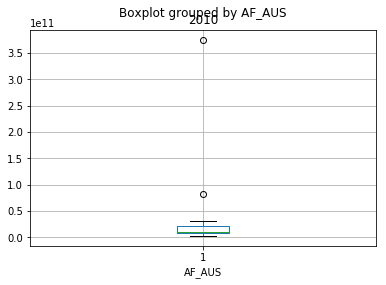

In [76]:
dados_af_aus.boxplot(column=2010, by= "AF_AUS")

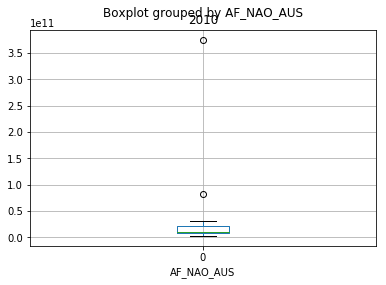

In [80]:
dados_af_aus.boxplot(column=2010, by= "AF_NAO_AUS")

In [30]:
dados_af_aus1 = africa_anos1.loc[af_aus]
print('PIB total dos países da SADC de 1971 à 1991')
dados_af_aus1.sum().sum() / 14

PIB total dos países da SADC de 1971 à 1991


394528142857.1429

In [31]:
dados_af_aus2 = africa_anos2.loc[af_aus]
print('PIB total dos países da SADC de 1992 à 2012')
dados_af_aus2.sum().sum() / 14

PIB total dos países da SADC de 1992 à 2012


679862857142.8572

In [32]:
print('Diferença por pais entre os intervalos de tempo dos paises da SADC')
(dados_af_aus2.sum().sum() - dados_af_aus1.sum().sum()) / 14
#FAZER EM PORCENTAGEM !!!! (O AUMENTO PERCENTUAL) -- OU FAZER A MÉDIA DE CADA E O AUMENTO PERCENTUAL DA MÉDIA!!!

Diferença por pais entre os intervalos de tempo dos paises da SADC


285334714285.7143

In [33]:
dados_af_nao_aus1 = africa_anos1.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1971 à 1991')
dados_af_nao_aus1.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1971 à 1991


165056629629.62964

In [34]:
dados_af_nao_aus2 = africa_anos2.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1992 à 2012')
dados_af_nao_aus2.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1992 à 2012


328766962962.96295

In [35]:
print('Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC')
(dados_af_nao_aus2.sum().sum() - dados_af_nao_aus1.sum().sum()) / 27

Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC


163710333333.33334

In [36]:
#OBS: O af_nao_aus tem praticamente o dobro de paises que o af_aus! tem que arranjar um jeito de ser proporcional!
# --- fazer a média? (é eficiente?  / o melhor jeito?)

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!